In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def dft_matrix(n):
    m = np.zeros((n,n), dtype=np.complex128)
    root = math.e ** (-2*np.pi*1j/n)

    for j in range(n):
        for k in range(n):
            m[j,k] = root ** (j*k)
    m = m/np.sqrt(n)
    return m

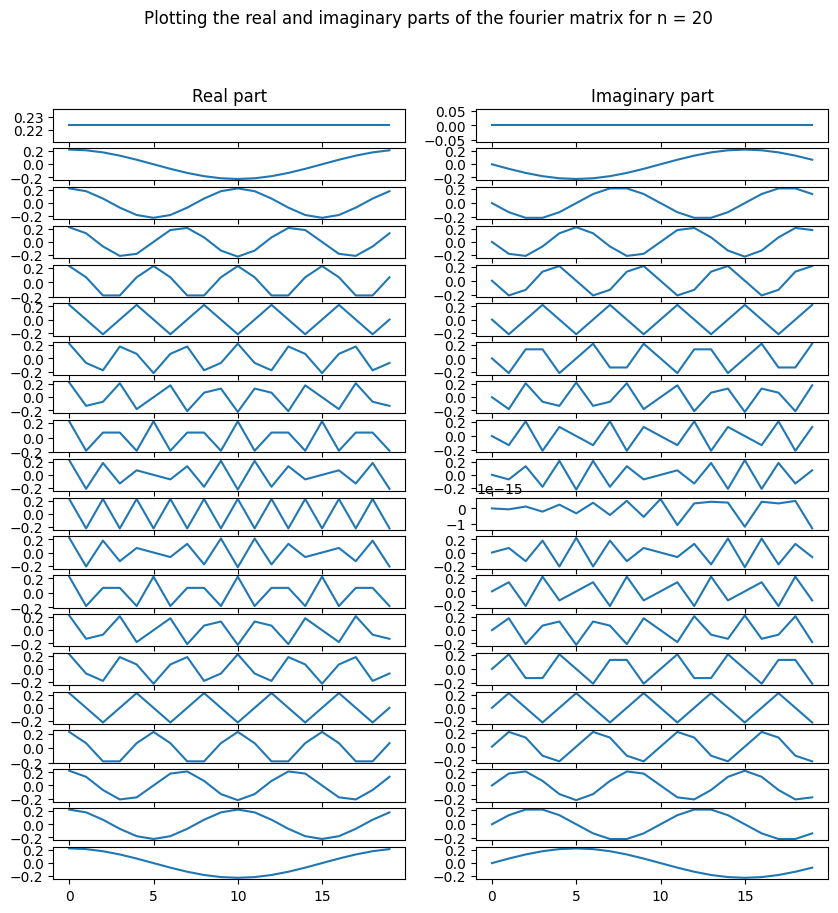

In [58]:
# Plotting the real/imaginary parts of the fourier matrix.
n = 20
fig, axs = plt.subplots(n, 2, figsize=(10,10))
fig.suptitle("Plotting the real and imaginary parts of the fourier matrix for n = 20")
m  = dft_matrix(n)

axs[0,0].set_title("Real part")
axs[0,1].set_title("Imaginary part")

for y in range(n):
    axs[y, 0].plot(np.arange(0,n,1), m[y].real)
    axs[y, 1].plot(np.arange(0,n,1), m[y].imag)

In [72]:
# Checking if the fourier matrix for n = 8 is unitary.

m = dft_matrix(8)
mhm = np.matmul(m.conj().T, m)
print(np.allclose(mhm, np.eye(8)))

True


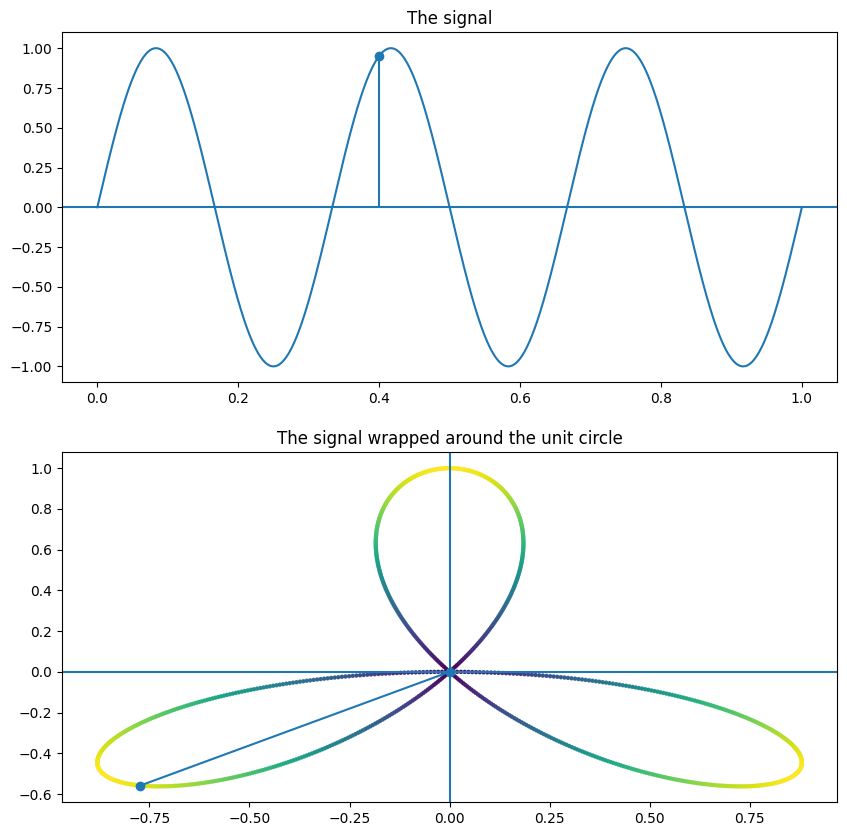

In [119]:
# Wrapping a simple signal on the unit circle.

fig, axs = plt.subplots(2, figsize=(10,10))
x = lambda t: np.sin(2*np.pi*t*3)

time = np.linspace(0, 1, 1000)
samples =  x(time)
complex = np.exp(-2*np.pi* 1j * time)  * samples
colors = np.absolute(complex)

axs[0].set_title("The signal")
axs[0].plot(time, samples)
axs[1].set_title("The signal wrapped around the unit circle")
axs[1].scatter(complex.real, complex.imag, marker='.', linewidth=0.1, c = colors)

sample_index = 400
some_time = time[sample_index]
some_sample = samples[sample_index]
some_complex = complex[sample_index]

axs[0].axhline(y=0)
axs[0].stem(some_time, some_sample)
axs[1].plot((some_complex.real,0), (some_complex.imag,0), marker="o")
axs[1].axhline(y=0)
axs[1].axvline(x=0)



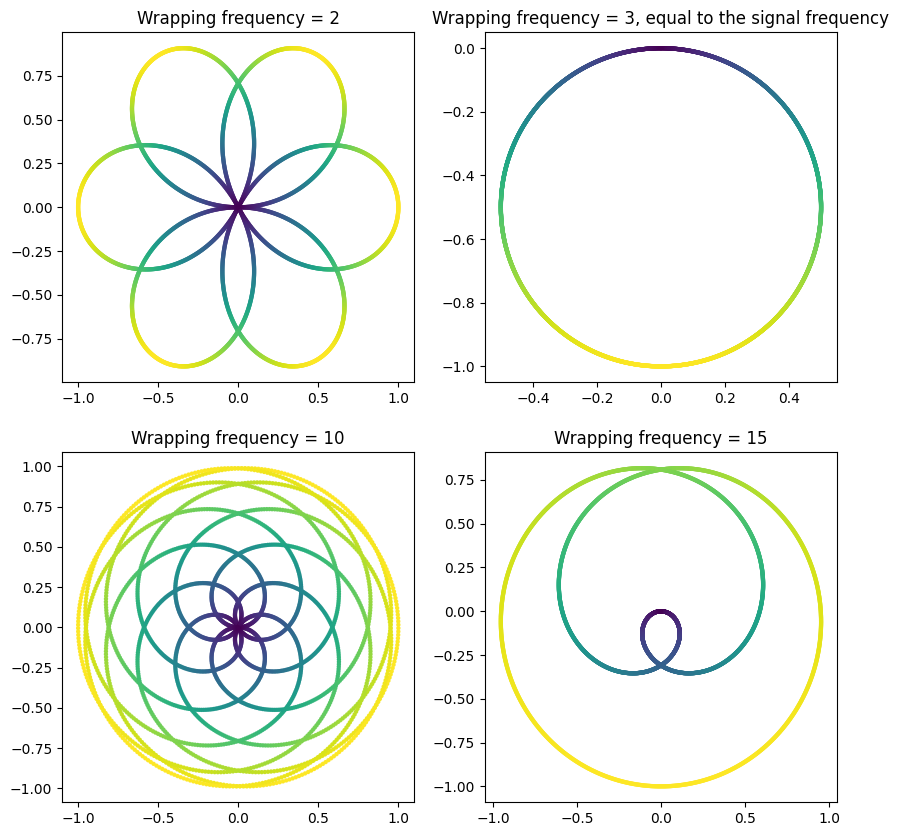

In [125]:
# Wrapping a simple signal on the unit circle and varying the wrapping frequency.

fig, axs = plt.subplots(2, 2, figsize=(10,10))
x = lambda t: np.sin(2*np.pi*t*3)
time = np.linspace(0, 1, 3000)

w1 = 2 
w2 = 3 
w3 = 10
w4 = 15

samples =  x(time)
complex1 = np.exp(-2*np.pi* 1j * time * w1)  * samples
complex2 = np.exp(-2*np.pi* 1j * time * w2)  * samples
complex3 = np.exp(-2*np.pi* 1j * time * w3)  * samples
complex4 = np.exp(-2*np.pi* 1j * time * w4)  * samples

colors1 = np.absolute(complex1)
colors2 = np.absolute(complex2)
colors3 = np.absolute(complex3)
colors4 = np.absolute(complex4)

axs[0,0].set_title("Wrapping frequency = 2")
axs[0,0].scatter(complex1.real, complex1.imag, marker='.', linewidth=0.1, c = colors1)
axs[0,1].set_title("Wrapping frequency = 3, equal to the signal frequency")
axs[0,1].scatter(complex2.real, complex2.imag, marker='.', linewidth=0.1, c = colors2)
axs[1,0].set_title("Wrapping frequency = 10")
axs[1,0].scatter(complex3.real, complex3.imag, marker='.', linewidth=0.1, c = colors3)
axs[1,1].set_title("Wrapping frequency = 15")
axs[1,1].scatter(complex4.real, complex4.imag, marker='.', linewidth=0.1, c = colors4)


<StemContainer object of 3 artists>

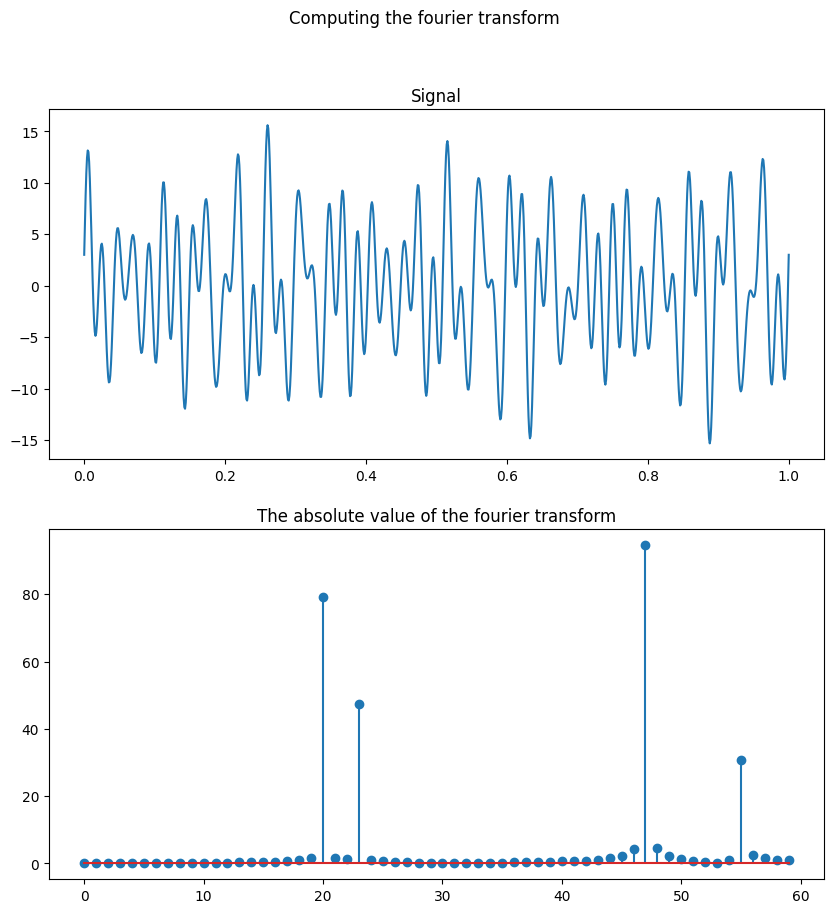

In [159]:
# Computing the fourier transform for a signal.
fig, axs = plt.subplots(2, figsize=(10,10))
fig.suptitle("Computing the fourier transform")

x = lambda t : 5* np.sin(2*np.pi*t*20) + 3 * np.cos(2*np.pi*t * 23) + 6 * np.sin(2*np.pi*t*47)  + 2 * np.sin(2*np.pi*t * 55)
time = np.linspace(0,1, 1000)
samples = x(time)

axs[0].set_title("Signal")
axs[0].plot(time, samples)
ftransform = np.matmul(dft_matrix(len(samples)) , samples)

axs[1].set_title("The absolute value of the fourier transform")
axs[1].stem(np.absolute(ftransform[:60]))


In [177]:
# Using the correlation formula to find out how strong a frequency is.

x = lambda t : 5* np.sin(2*np.pi*t*20) + 3 * np.cos(2*np.pi*t * 23) + 6 * np.sin(2*np.pi*t*47)  + 2 * np.sin(2*np.pi*t * 55)
time = np.linspace(0,1, 1000)
samples = x(time)

N = len(samples)
w =  47
up = -2*np.pi * 1j * w/N * np.arange(0, len(samples), 1)
complex_nums =  math.e **  up

dot = np.dot(samples, complex_nums)
print(np.abs(dot))

2991.2195355189106
